# Importing  Libraries and Data

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [91]:
! pip install seaborn

In [92]:
! pip install plotly

In [93]:
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [94]:
df=pd.read_excel('/content/Telecom Churn Rate Dataset (1).xlsx')

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Features Description

* customerID: Customer ID
* genderCustomer: gender (female, male)
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* PartnerWhether: the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* numAdminTickets: The number of Admin Ticket
* numTechTickets: The number of Tech Ticket
* Churn: Whether the customer churned or not (Yes or No)

# Data Preprocessing

**1) There seem to be ' ' in 'TotalCharges'. So I have to drop ' ' to convert 'TotalCharges' to numerical.**

In [97]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [98]:
df=df.drop(df.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]])

In [99]:
df['TotalCharges']=df['TotalCharges'].astype(float)

**2) If there are some duplicated liness, I have to drop them.**

In [100]:
df.duplicated().sum()

0

**3) Dropping 'customerID'**

In [101]:
df = df.drop('customerID', axis=1)

**4) Creating numerical and categorical lists**

In [102]:
df['numAdminTickets'].unique()

array([0, 1, 5, 2, 4, 3])

In [103]:

# distinction is based on the number of different values in the column

columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) >=6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn'

In [104]:
numeric_columns

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets']

**5) Label Encoding**

In [105]:

# Label Encoding refers to converting the labels into a numeric form.
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)


**6) Dataset - Basic statistics**

In [106]:

df1[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.514932,0.420222
std,24.545260,30.085974,2266.771362,1.273921,1.250984
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,0.000000,0.000000
max,72.000000,118.750000,8684.800000,5.000000,9.000000


# Data Imbalance

In [107]:

#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

<ipython-input-108-928bd497d99f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df1,
<ipython-input-108-928bd497d99f>:15: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(data = df1,
<ipython-input-108-928bd497d99f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])


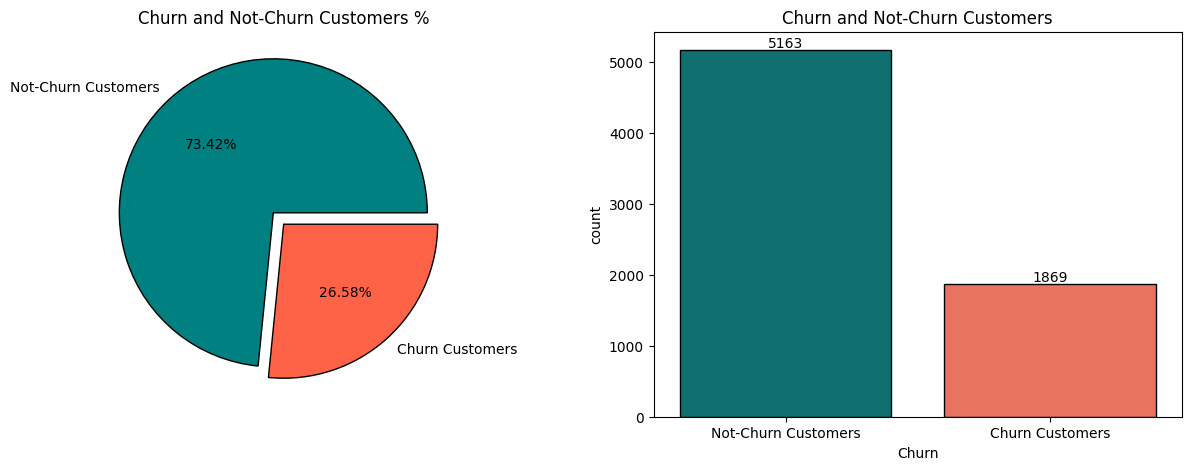

In [108]:

l1 = list(df1['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'],
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df1,
                   x='Churn',
                   palette = palette,
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])

plt.title('Churn and Not-Churn Customers')
plt.show()

# Distributions

**1) Numerical features distibution**

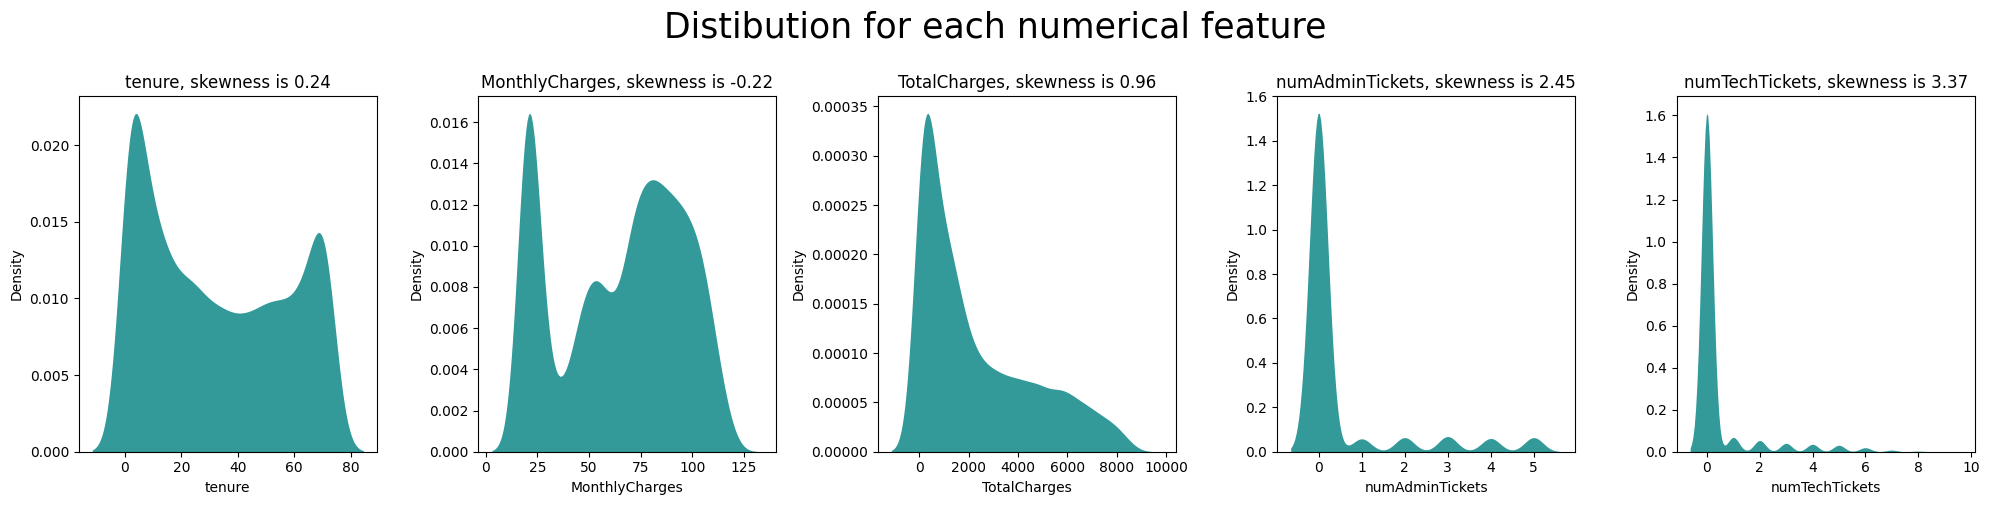

In [109]:

# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=5, suptitle='Distibution for each numerical feature')
plt.tight_layout()

**2) Numerical features boxplot**

<ipython-input-110-dd662a1d149c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
<ipython-input-110-dd662a1d149c>:7: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
<ipython-input-110-dd662a1d149c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
<ipython-input-110-dd662a1d149c>:7: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette

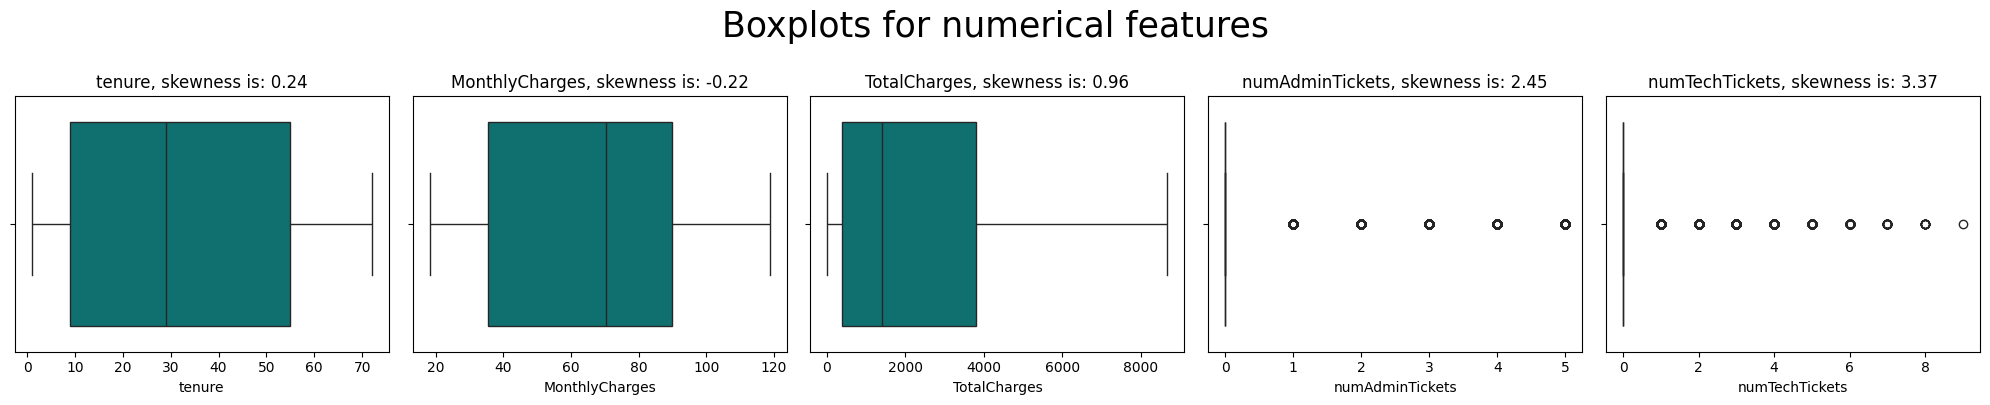

In [110]:

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], palette = palette)
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df1, columns_list=numeric_columns, rows=1, cols=5, suptitle='Boxplots for numerical features')
plt.tight_layout()

# Numerical Features by Churn and not Churn

**1) Monthly Charges and Total Charges**

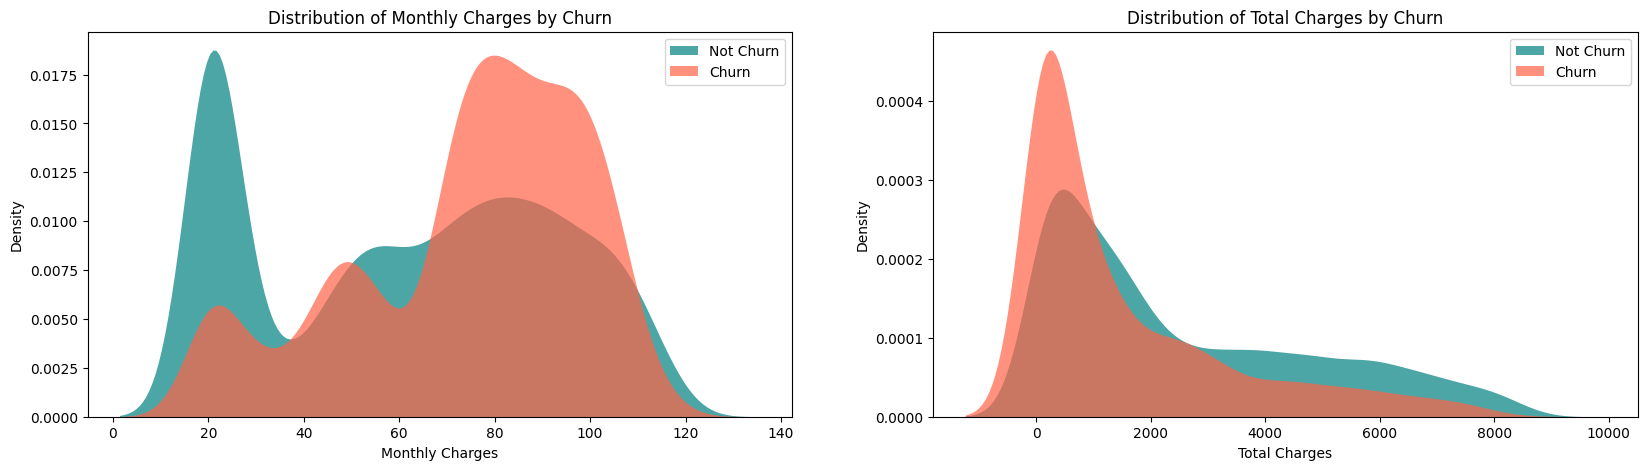

In [111]:

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')
plt.show()

**2) Tenure**

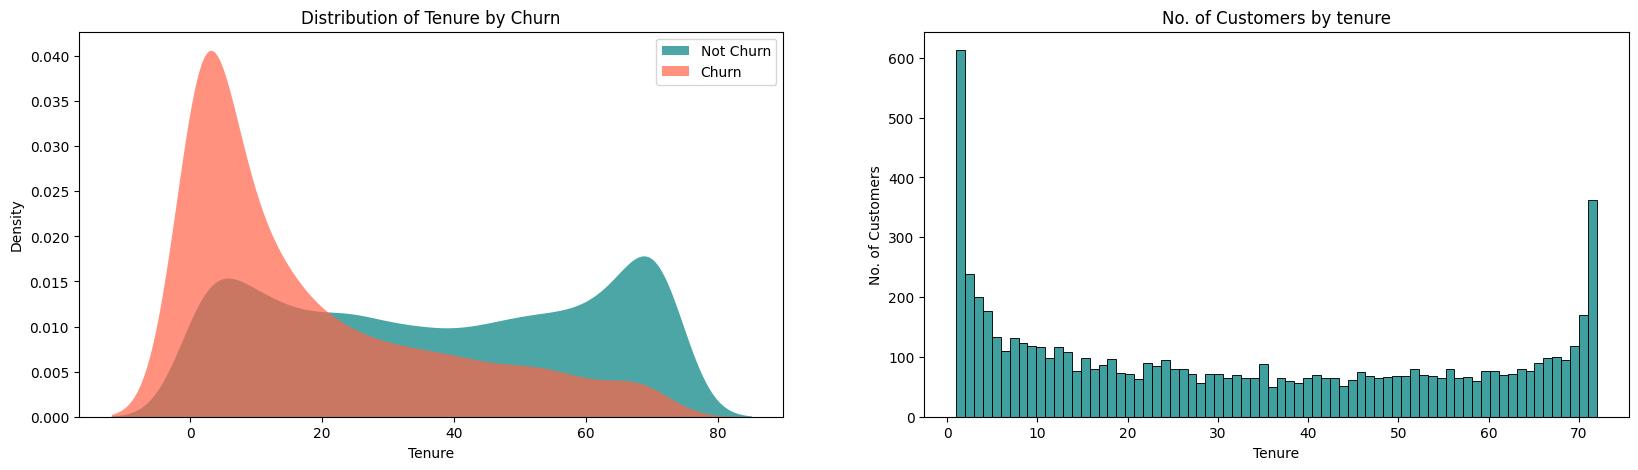

In [112]:

#plt.figure(figsize=(7,3))

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.tenure[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by Churn')

plt.subplot(1,2,2)
ax = sns.histplot(df1["tenure"], bins=72, kde=False, color='#008080')
ax.set(title = "No. of Customers by tenure")
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')

plt.show()

**3) Contract**

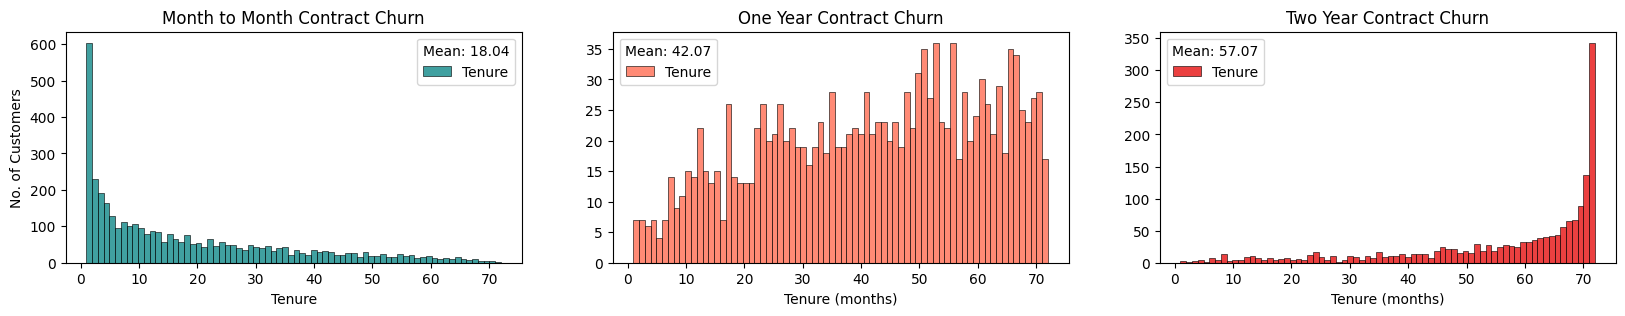

In [113]:

two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()

**4) Scatter plot by Total Charge, Monthly Charge and Tenure**

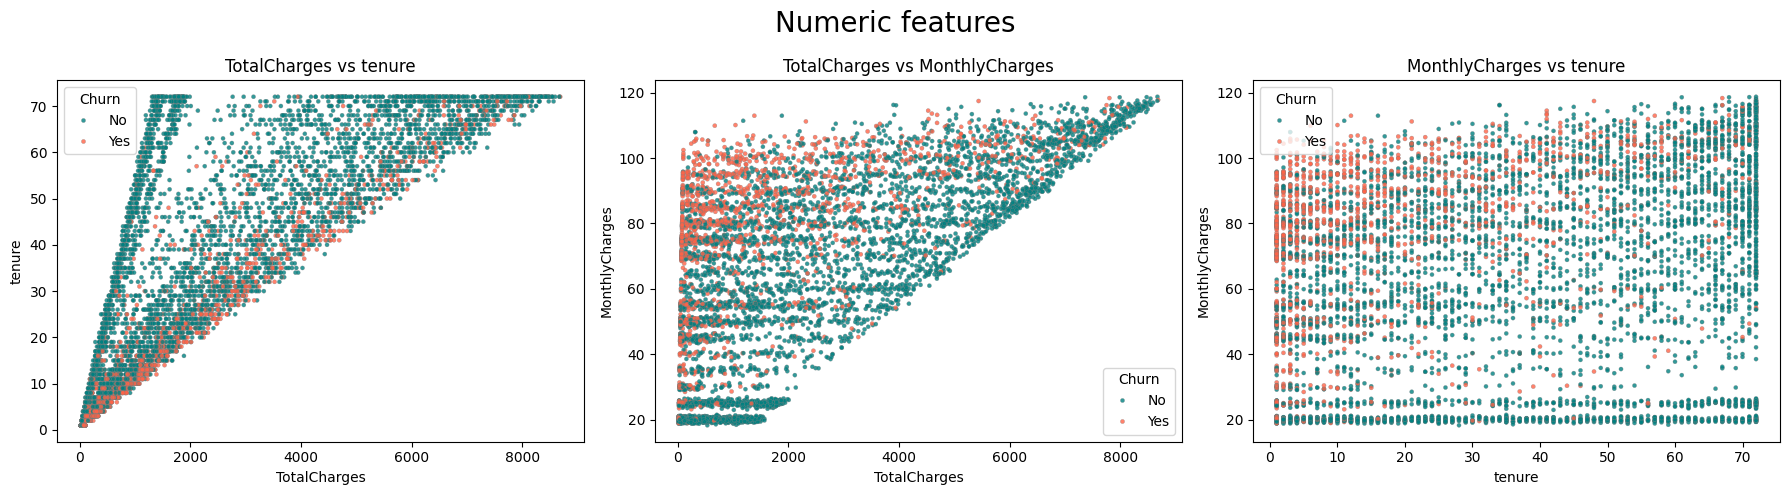

In [114]:

palette2 = ['#008080','#FF6347']

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
ax1 = sns.scatterplot(x = df['TotalCharges'], y = df['tenure'], hue = "Churn",
                    data = df, palette = palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs tenure')

plt.subplot(1,3,2)
ax2 = sns.scatterplot(x = df['TotalCharges'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('TotalCharges vs MonthlyCharges')

plt.subplot(1,3,3)
ax2 = sns.scatterplot(x = df['tenure'], y = df['MonthlyCharges'], hue = "Churn",
                    data = df, palette =palette2, edgecolor='grey', alpha = 0.8, s=9)
plt.title('MonthlyCharges vs tenure')

fig.suptitle('Numeric features', fontsize = 20)
plt.tight_layout()
plt.show()

**5) NumAdminTickets and NumTechTickets**

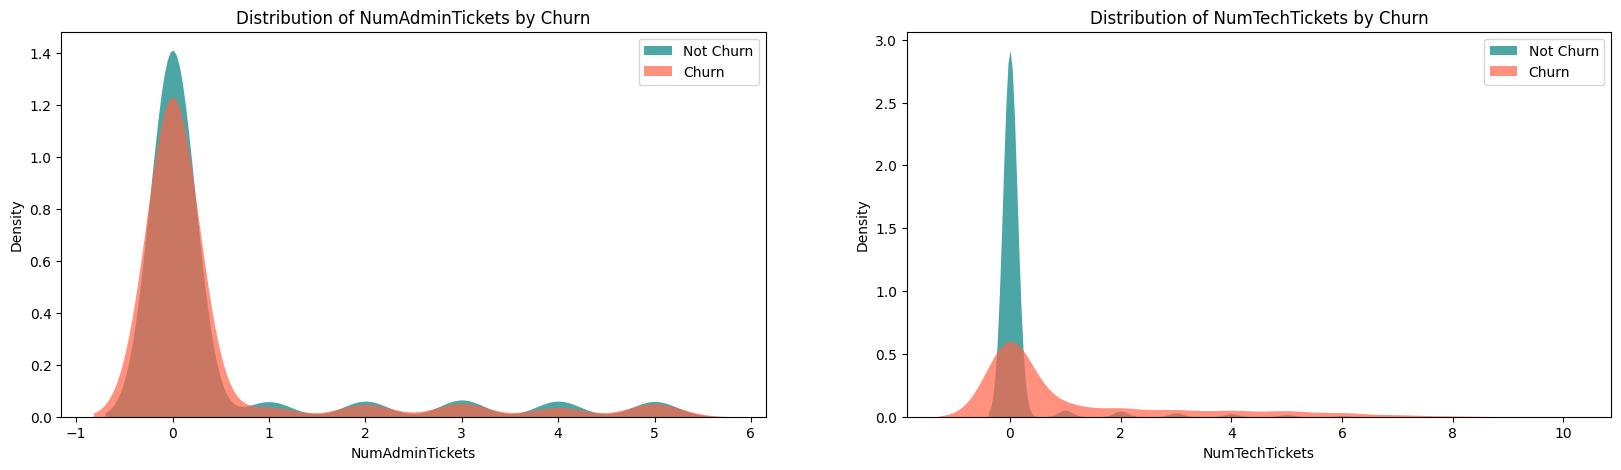

In [115]:

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(df1.numAdminTickets[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.numAdminTickets[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('NumAdminTickets')
ax.set_title('Distribution of NumAdminTickets by Churn')

plt.subplot(1,2,2)
ax = sns.kdeplot(df1.numTechTickets[(df1["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(df1.numTechTickets[(df1["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('NumTechTickets')
ax.set_title('Distribution of NumTechTickets by Churn')
plt.show()

# Categorical Features by Churn and not Churn

**1) Customer information by Churn and not Churn**

<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')


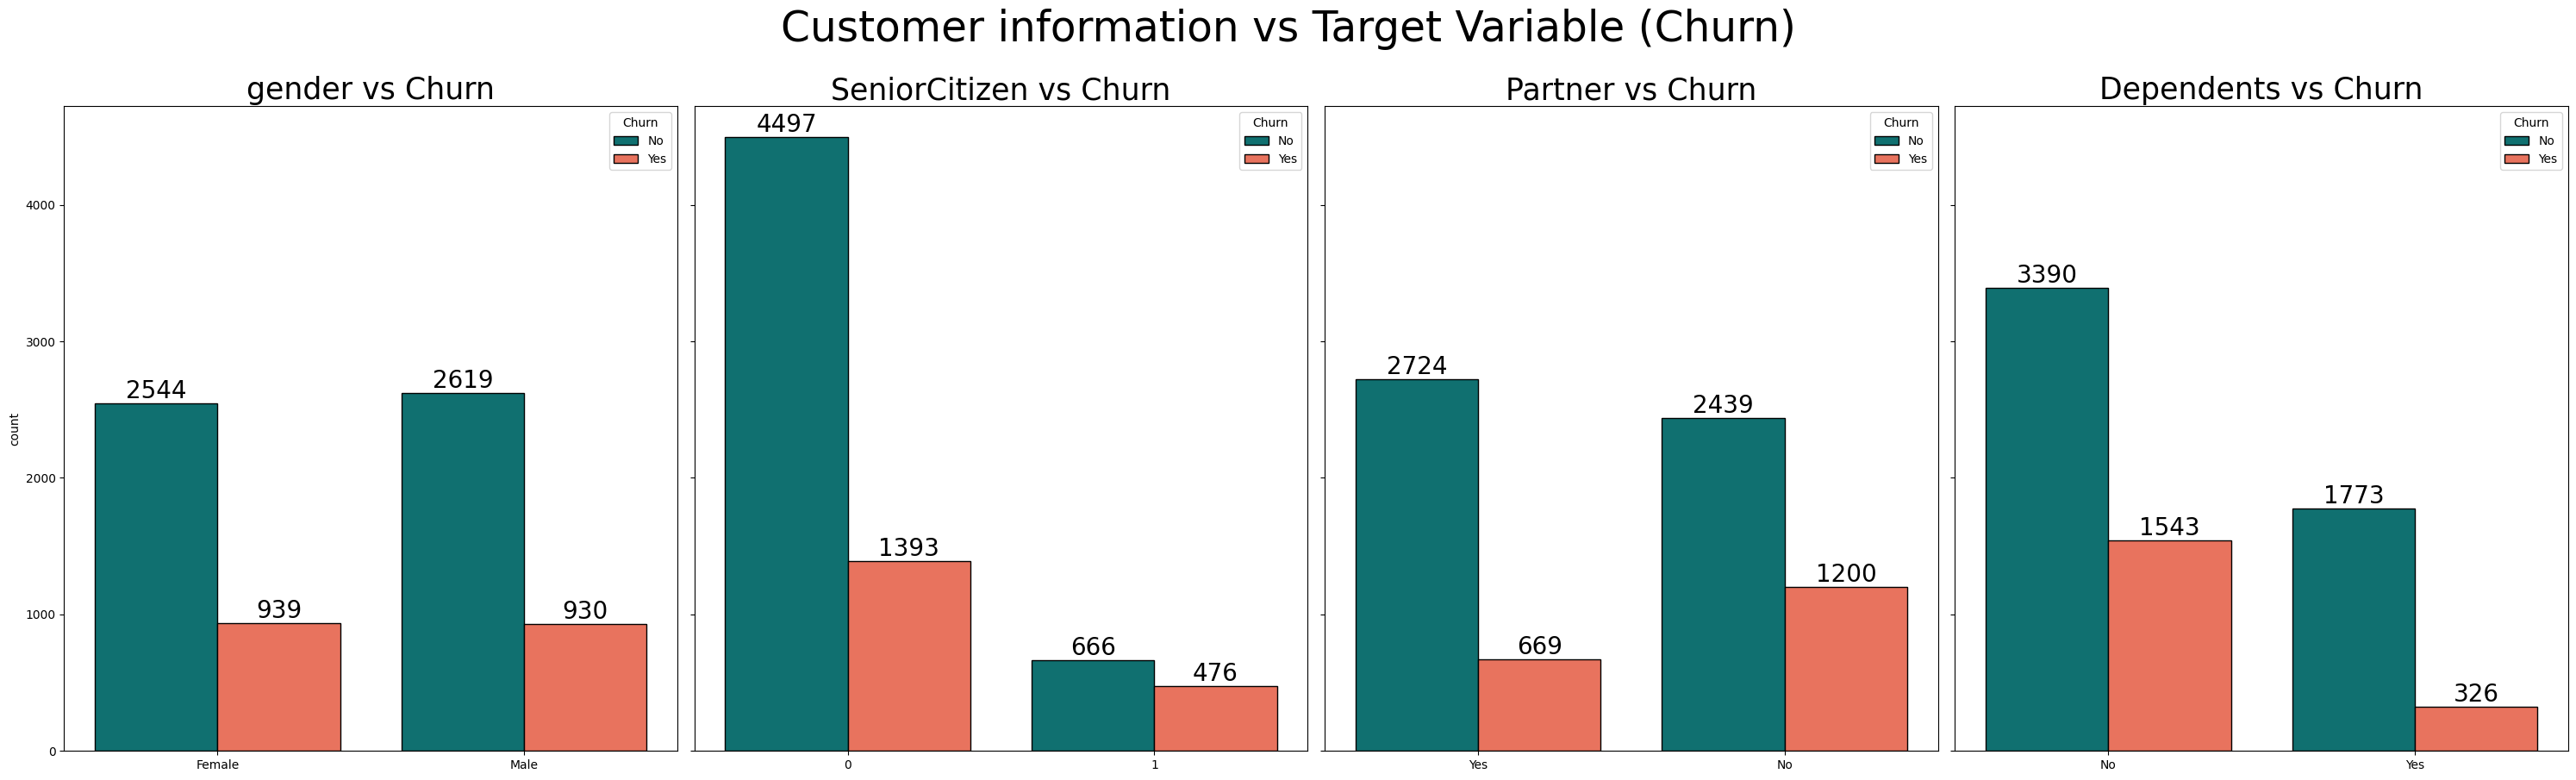

In [116]:

list1 = ['gender','SeniorCitizen','Partner','Dependents']
hue = "Churn"
figsize = (30,9)

# defining function for countplots
def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for i in ax.containers:
            ax.bar_label(i,size=20)
            ax.set_xlabel('')

countplots_custom(dataset=df, columns_list=list1, rows=1, cols=4, figsize=figsize, hue = hue, palette = palette, suptitle='Customer information vs Target Variable (Churn)')
plt.tight_layout()

In [117]:

gender = df1[df1['Churn'] == 1]['gender'].value_counts()
pie_values1 = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

senior = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
pie_values2 = [senior[0] / sum(senior) * 100, senior[1] / sum(senior) * 100]

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
pie_values3 = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100]

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
pie_values4 = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100]

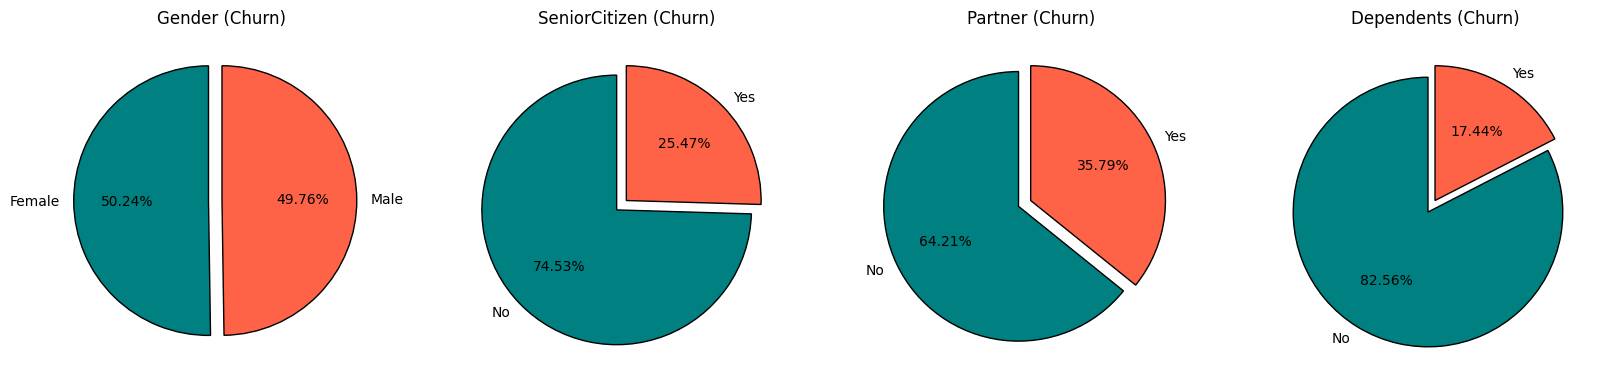

In [118]:

ax,fig = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

plt.subplot(1,4,1)
plt.pie(pie_values1,labels = ['Female','Male'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender (Churn)')

plt.subplot(1,4,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen (Churn)')

plt.subplot(1,4,3)
plt.pie(pie_values3,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner (Churn)')

plt.subplot(1,4,4)
plt.pie(pie_values4,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents (Churn)')

plt.show()

**2) Provided services by Churn and not Churn**

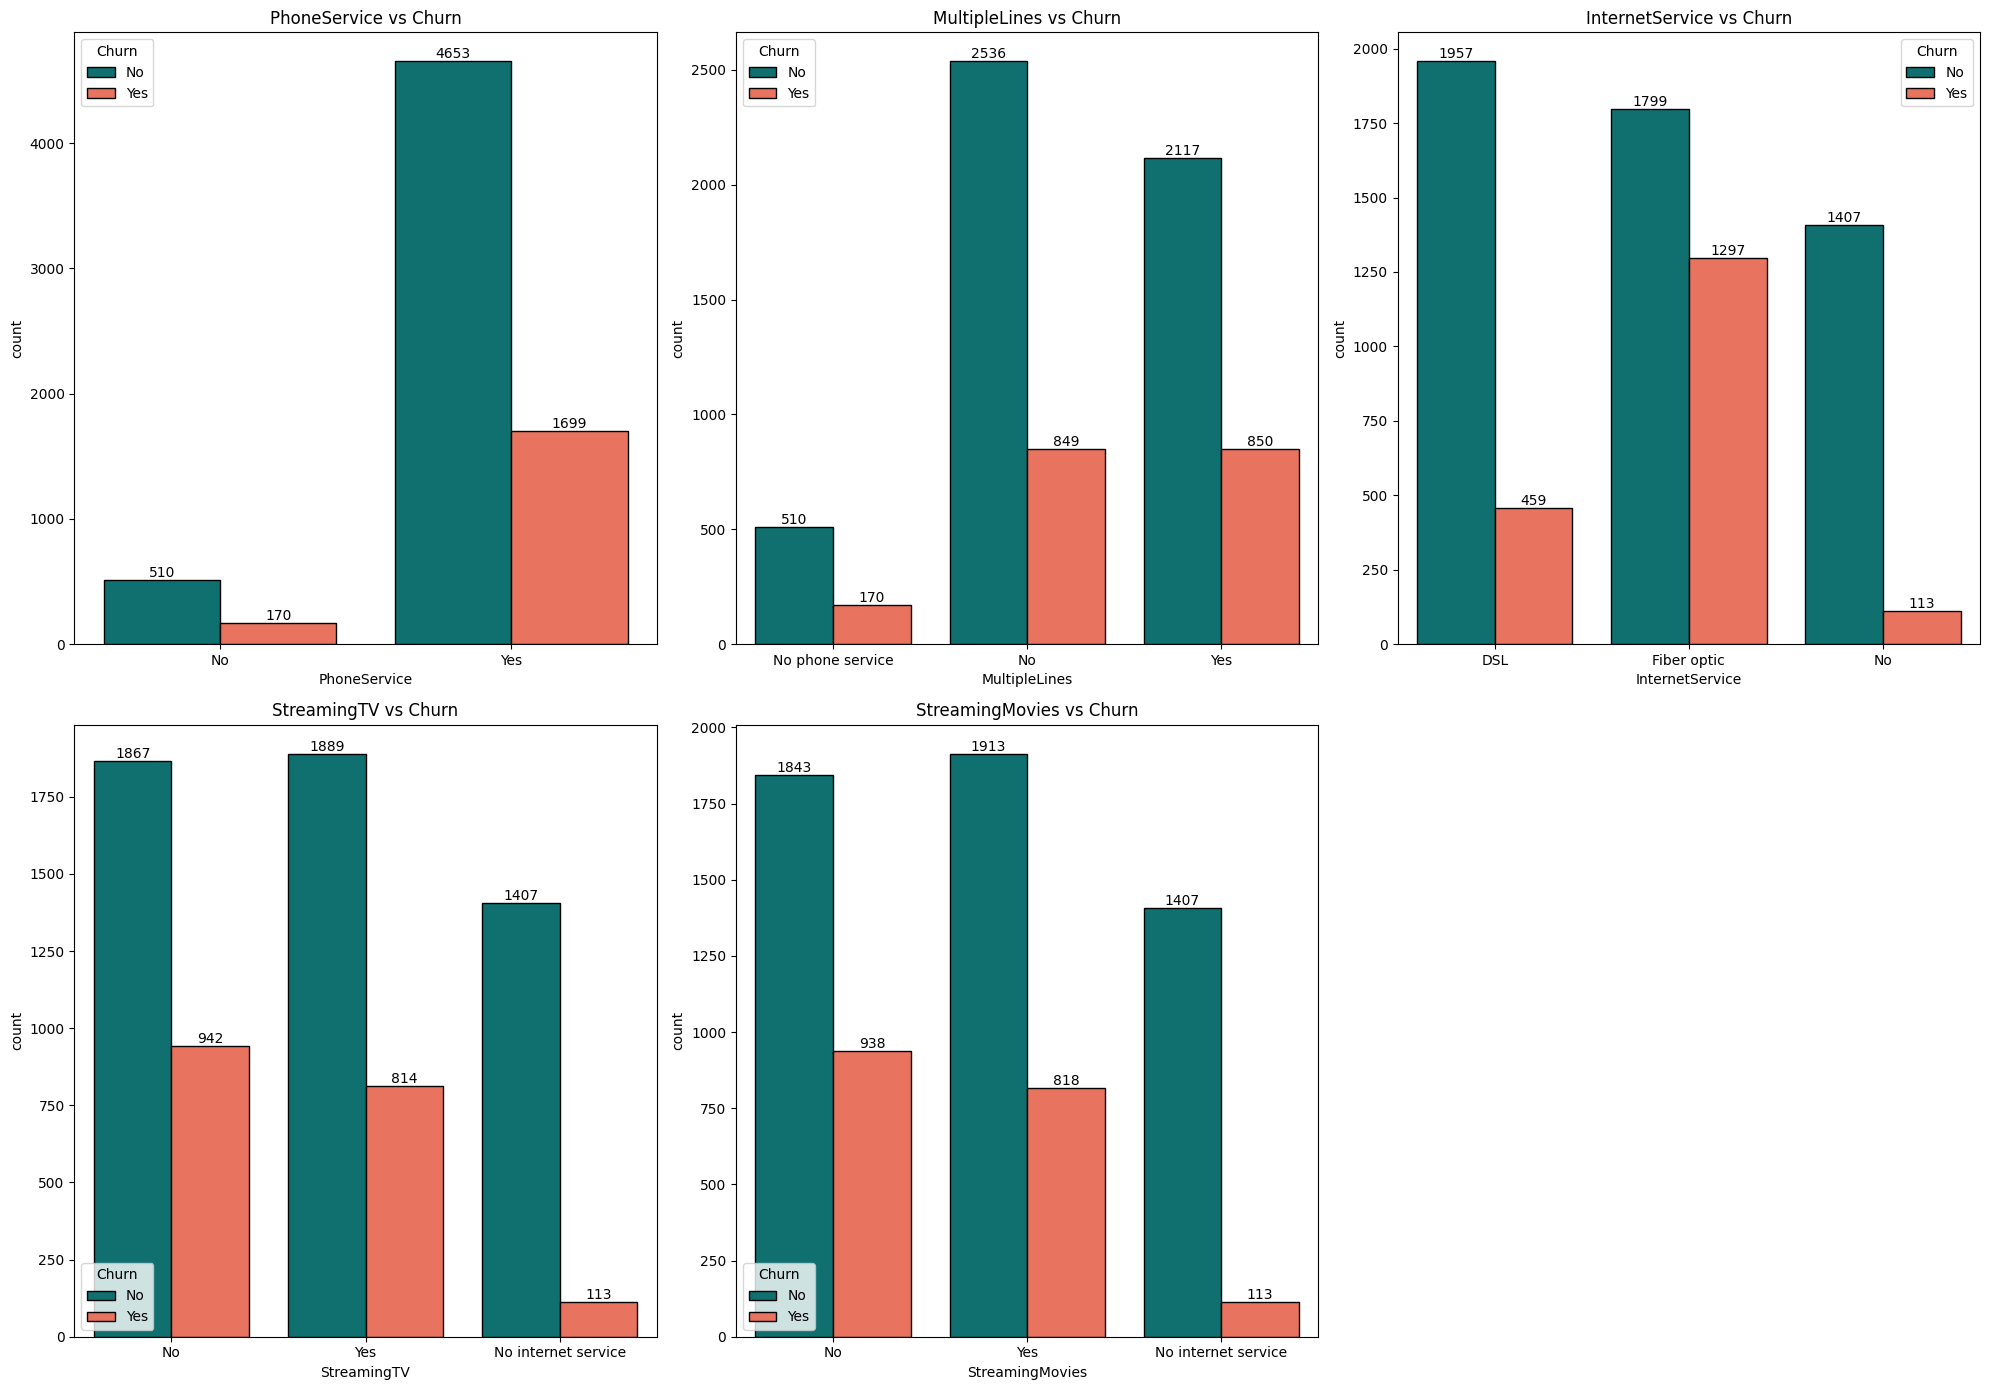

In [119]:

list2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']
fig = plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
ax = sns.countplot(data = df, x=list2[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[0] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,2)
ax = sns.countplot(data = df, x=list2[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[1] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,3)
ax = sns.countplot(data = df, x=list2[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[2] + ' vs Churn'
plt.title(title)

plt.subplot(2,3,4)
ax = sns.countplot(data = df, x=list2[3], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[3] + ' vs Churn'
plt.title(title);

plt.subplot(2,3,5)
ax = sns.countplot(data = df, x=list2[4], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list2[4] + ' vs Churn'
plt.title(title);

plt.tight_layout()
plt.show()

In [120]:

phone = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
pie_values1 = [phone[0] / sum(phone) * 100, phone[1] / sum(phone) * 100]

MultipleLines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
pie_values2 = [MultipleLines[0] / sum(MultipleLines) * 100, MultipleLines[1] / sum(MultipleLines) * 100, MultipleLines[2] / sum(MultipleLines) * 100]

InternetService = df1[df1['Churn'] == 1]['InternetService'].value_counts()
pie_values3 = [InternetService[0] / sum(InternetService) * 100, InternetService[1] / sum(InternetService) * 100, InternetService[2] / sum(InternetService) * 100]

StreamingTV = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
pie_values4 = [StreamingTV[0] / sum(StreamingTV) * 100, StreamingTV[1] / sum(StreamingTV) * 100, StreamingTV[2] / sum(StreamingTV) * 100]

StreamingMovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
pie_values5 = [StreamingMovies[0] / sum(StreamingMovies) * 100, StreamingMovies[1] / sum(StreamingMovies) * 100, StreamingMovies[2] / sum(StreamingMovies) * 100]

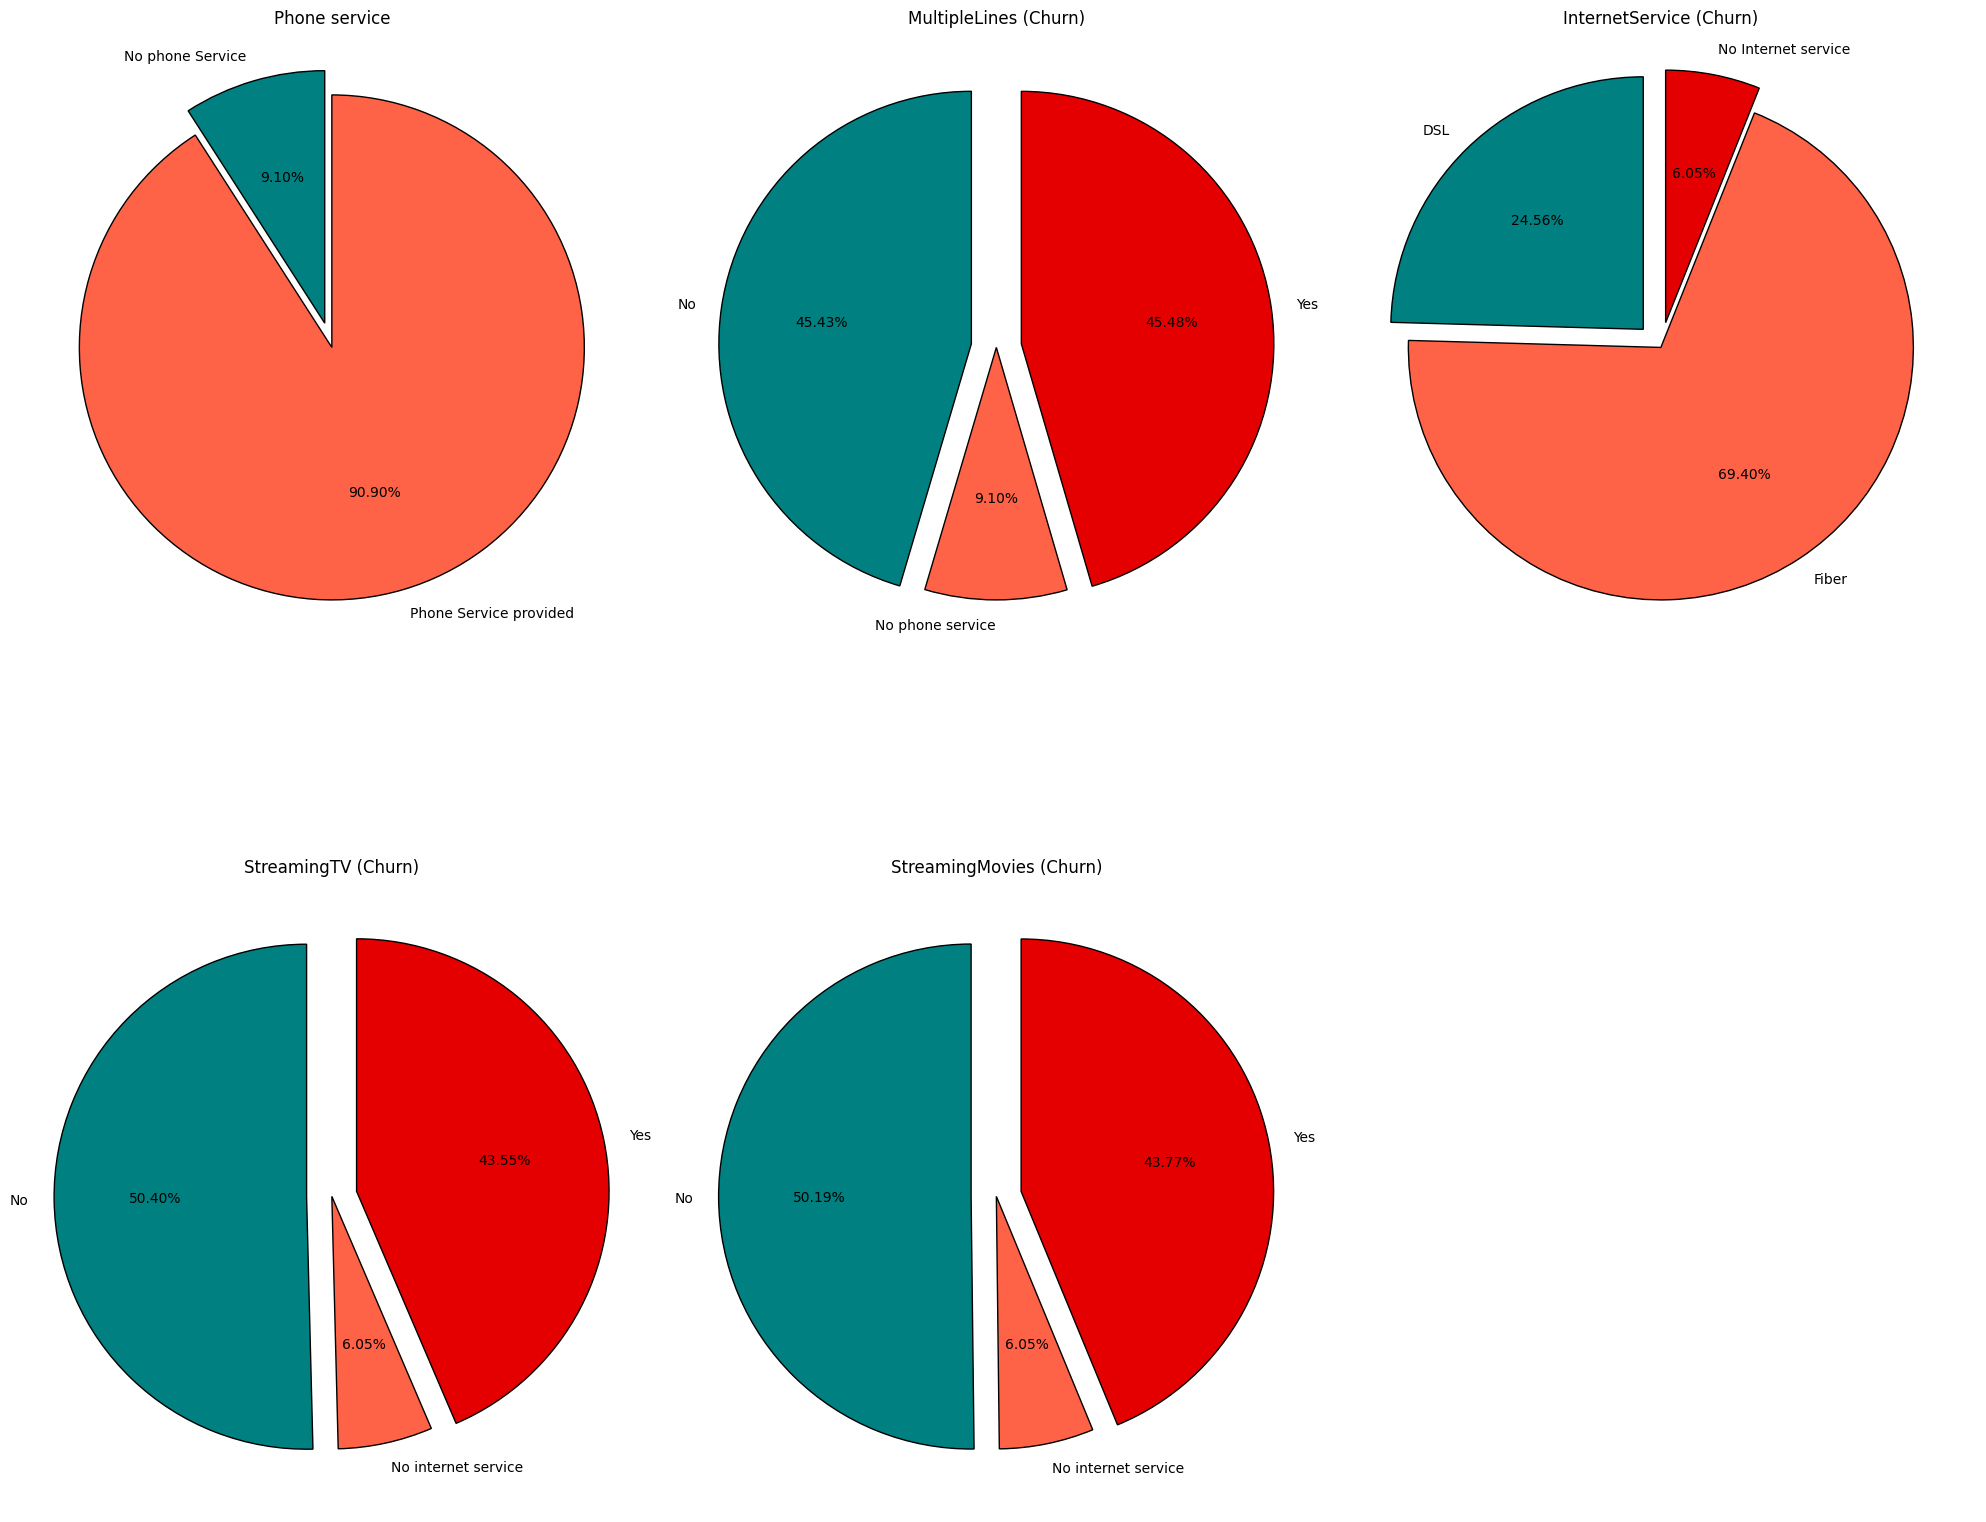

In [121]:

fig = plt.figure(figsize=(20,18))

plt.subplot(2,3,1)
plt.pie(pie_values1,labels = ['No phone Service','Phone Service provided'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone service')

plt.subplot(2,3,2)
plt.pie(pie_values2,labels = ['No','No phone service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines (Churn)')

plt.subplot(2,3,3)
plt.pie(pie_values3,labels = ['DSL','Fiber','No Internet service'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService (Churn)')

plt.subplot(2,3,4)
plt.pie(pie_values4,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV (Churn)')

plt.subplot(2,3,5)
plt.pie(pie_values5,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies (Churn)')

plt.tight_layout()
plt.show()

**3) Support services by Churn and not Churn**

<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')
<ipython-input-116-5b1aea245c27>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax=sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue = hue, palette = palette, edgecolor = 'black')


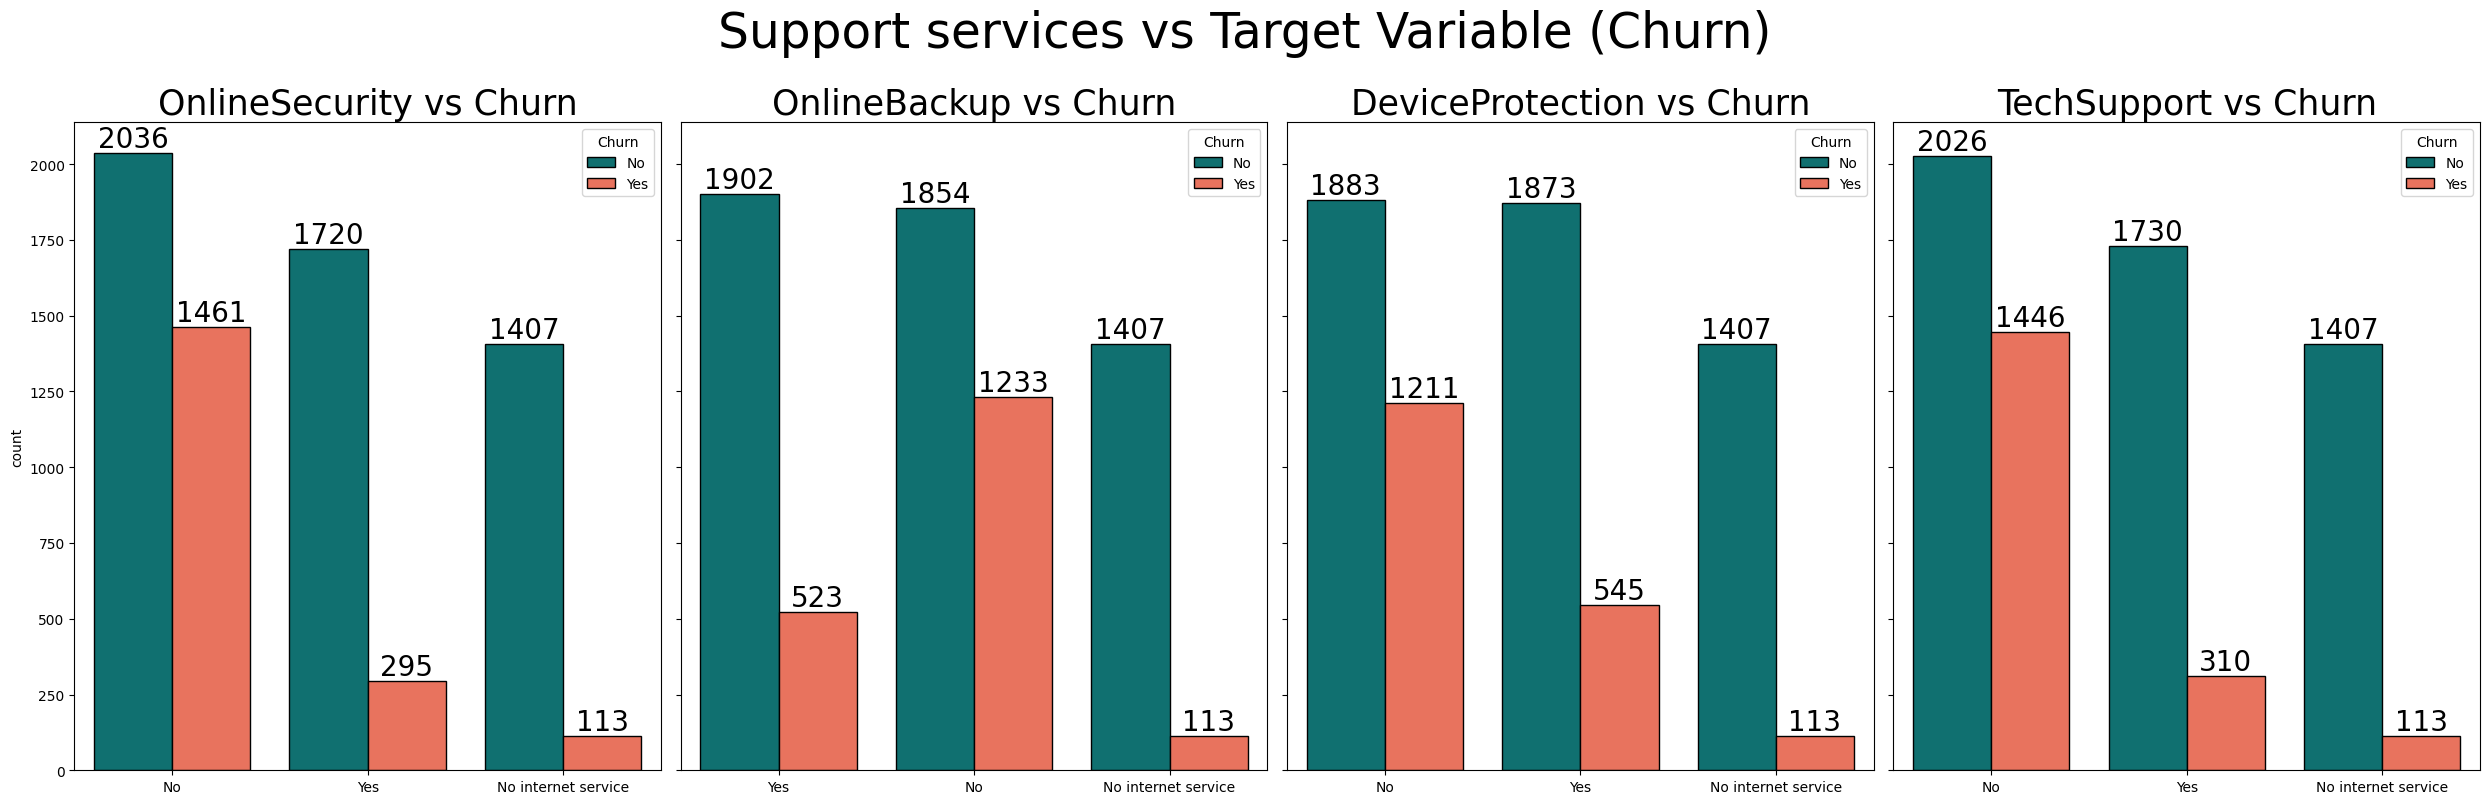

In [122]:

list3 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

countplots_custom(dataset=df, columns_list=list3, rows=1, cols=4, figsize=(25,8), hue = hue, palette = palette, suptitle='Support services vs Target Variable (Churn)')
plt.tight_layout()

In [123]:

pie_values1 = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
pie_values1 = [pie_values1[0] / sum(pie_values1) * 100, pie_values1[1] / sum(pie_values1) * 100, pie_values1[2] / sum(pie_values1) * 100]

pie_values2 = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
pie_values2 = [pie_values2[0] / sum(pie_values2) * 100, pie_values2[1] / sum(pie_values2) * 100, pie_values2[2] / sum(pie_values2) * 100]

pie_values3 = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
pie_values3 = [pie_values3[0] / sum(pie_values3) * 100, pie_values3[1] / sum(pie_values3) * 100, pie_values3[2] / sum(pie_values3) * 100]

pie_values4 = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
pie_values4 = [pie_values4[0] / sum(pie_values4) * 100, pie_values4[1] / sum(pie_values4) * 100, pie_values4[2] / sum(pie_values4) * 100]

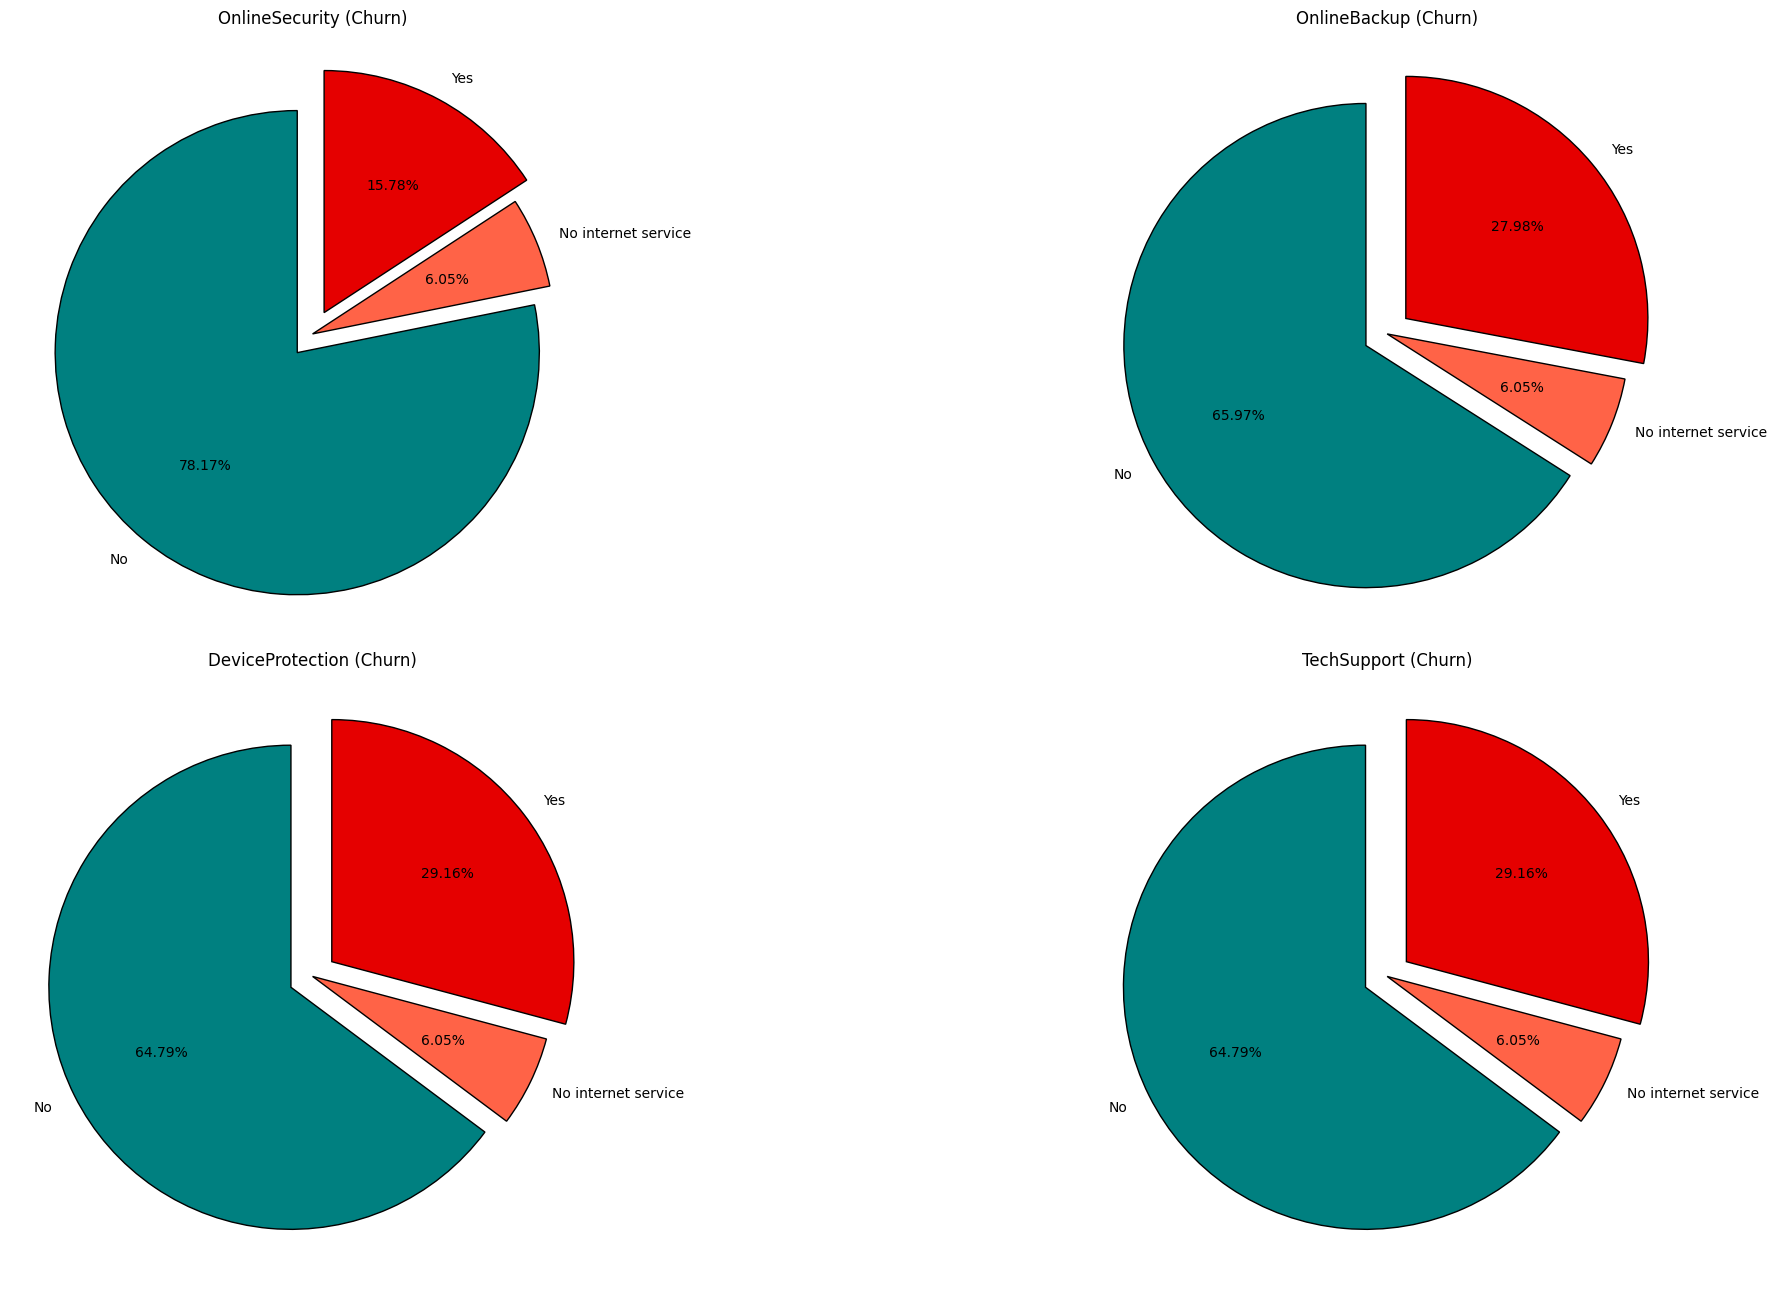

In [124]:

fig = plt.figure(figsize=(25,13))

plt.subplot(2,2,1)
plt.pie(pie_values1,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity (Churn)')

plt.subplot(2,2,2)
plt.pie(pie_values2,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup (Churn)')

plt.subplot(2,2,3)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection (Churn)')

plt.subplot(2,2,4)
plt.pie(pie_values3,labels = ['No','No internet service','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport (Churn)')
plt.tight_layout()
plt.show()

**4) Payments by Churn and not Churn**

<ipython-input-125-244152cdfbf4>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])


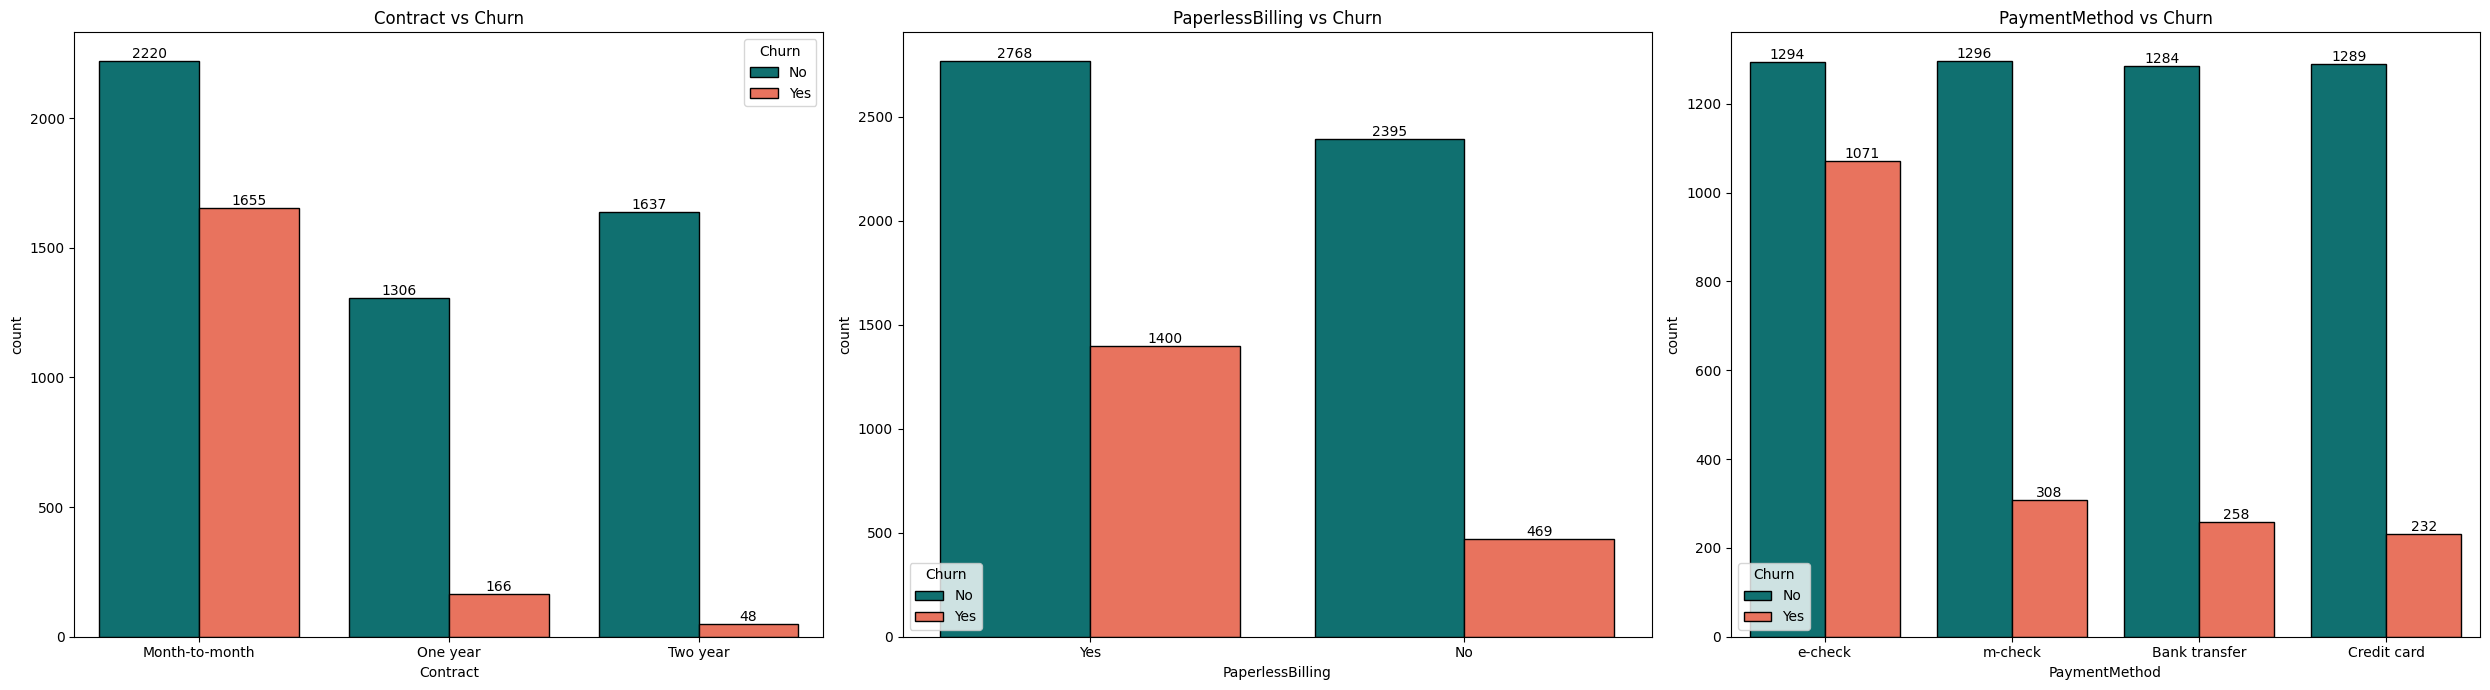

In [125]:

list3 = ['Contract','PaperlessBilling','PaymentMethod']

fig = plt.subplots(nrows = 1, ncols = 3, figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(data = df, x=list3[0], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='upper right', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(data = df, x=list3[1], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
title = list3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(data = df, x=list3[2], hue = "Churn", palette = palette2, edgecolor = 'black')
ax.legend(loc='lower left', title='Churn')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['e-check','m-check','Bank transfer','Credit card'])
title = list3[2] + ' vs Churn'
plt.title(title)

plt.tight_layout()
plt.show()

In [126]:

contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
pie_values1 = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100]

paperless = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
pie_values2 = [paperless[0] / sum(paperless) * 100, paperless[1] / sum(paperless) * 100]

payment = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
pie_values3 = [payment[0] / sum(payment) * 100, payment[1] / sum(payment) * 100, payment[2] / sum(payment) * 100, payment[3] / sum(payment) * 100]

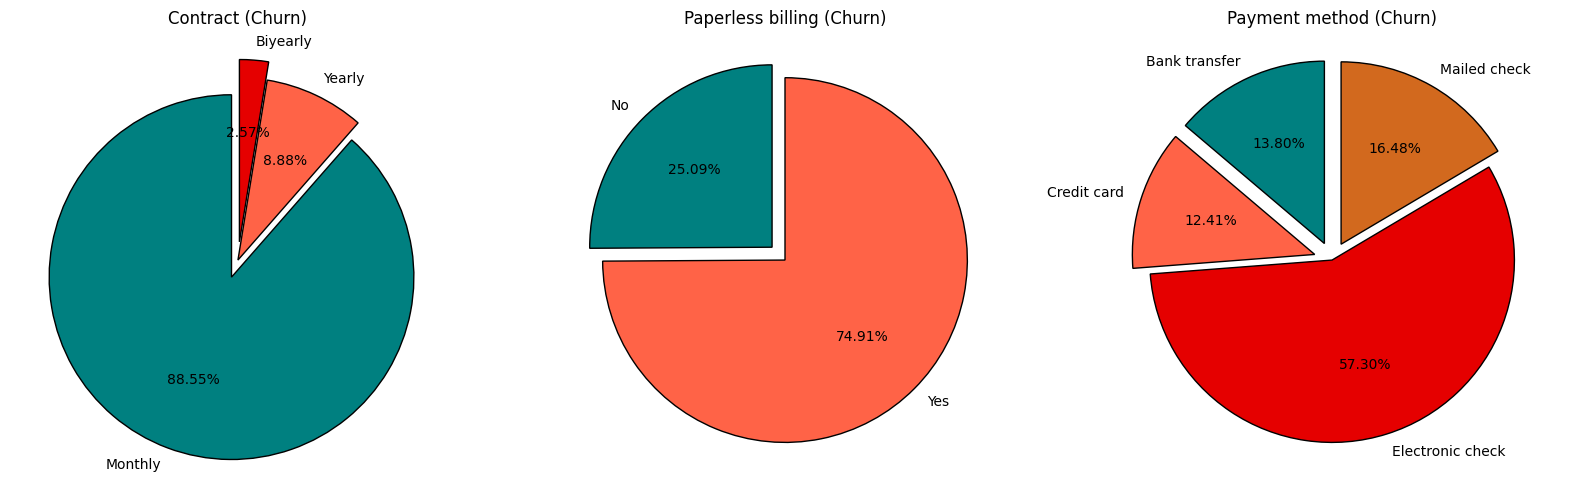

In [127]:

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,20))

plt.subplot(1,3,1)
plt.pie(pie_values1,labels = ['Monthly','Yearly','Biyearly'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract (Churn)')

plt.subplot(1,3,2)
plt.pie(pie_values2,labels = ['No','Yes'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Paperless billing (Churn)')

plt.subplot(1,3,3)
plt.pie(pie_values3,labels = ['Bank transfer','Credit card','Electronic check','Mailed check'],
        autopct='%1.2f%%',
        startangle = 90,
        explode = (0.1,0.1,0,0.1),
        colors = palette,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Payment method (Churn)')

plt.show()

# Features Engineering

**1) Train test split - stratified splitting**

In [128]:

df3=df
df3[['Churn']] = df3[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df3.drop('Churn', axis=1)
y = df3['Churn']

In [129]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

**2) Features scaling**

In [130]:

from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(X_train[numeric_columns])
Standard_Scaler.transform(X_test[numeric_columns])

array([[-1.20229604,  0.31446751, -0.91429745, -0.41355748, -0.3389241 ],
       [ 1.48663606,  0.48182957,  1.40739802,  3.43047168, -0.3389241 ],
       [-0.06153697,  0.86957928,  0.30639595, -0.41355748,  2.00891174],
       ...,
       [-0.83562348, -1.1487077 , -0.84708499, -0.41355748, -0.3389241 ],
       [ 0.10142862,  0.69724608,  0.35674491, -0.41355748,  1.22629979],
       [-0.79488208,  0.81158253, -0.51179119, -0.41355748,  0.44368785]])

In [131]:

print(categoric_columns)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


**3) One hot Encoder**

In [132]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
# Encoding multiple columns. Unfortunately you cannot pass a list here so you need to copy-paste all printed categorical columns.
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies',
      'Contract', 'PaperlessBilling', 'PaymentMethod']))

In [133]:

# Transforming
transformed = transformer.fit_transform(X_train)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_train.index

# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)

X_train.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

In [134]:

# Transforming
transformed = transformer.transform(X_test)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
# One-hot encoding removed index. Let's put it back:
transformed_df.index = X_test.index

# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)

X_test.drop(categoric_columns, axis=1, inplace=True) # Dropping categorical columns

# Modeling

In [135]:

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

**1) Features importance**

In [136]:
print(X_train.columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'onehotencoder__gender_Female',
       'onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_0',
       'onehotencoder__SeniorCitizen_1', 'onehotencoder__Partner_No',
       'onehotencoder__Partner_Yes', 'onehotencoder__Dependents_No',
       'onehotencoder__Dependents_Yes', 'onehotencoder__PhoneService_No',
       'onehotencoder__PhoneService_Yes', 'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes

In [137]:

# Setting new feature names

X_train.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','NumAdminTickets',
       'NumTechTickets',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Tenure', 'MonthlyCharges', 'TotalCharges','NumAdminTickets',
       'NumTechTickets',
       'gender_Female','gender_Male',
       'SeniorCitizen_0','SeniorCitizen_1',
       'Partner_No','Partner_Yes',
       'Dependents_No','Dependents_Yes',
       'PhoneService_No','PhoneService_Yes',
       'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
       'InternetService_DSL','InternetService_Fiber','InternetService_No',
       'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
       'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
       'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
       'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
       'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No','PaperlessBilling_Yes',
       'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']
# After renaming the columns

X_train.head()

,Tenure,MonthlyCharges,TotalCharges,NumAdminTickets,NumTechTickets,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
3687,19,100.00,1888.65,0,0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5553,1,55.70,55.70,3,0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6870,49,74.60,3720.35,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1874,43,86.45,3574.50,0,0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
147,1,45.65,45.65,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [138]:

from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

In [139]:

# fit and apply the transform
X_train, y_train = ros.fit_resample(X_train, y_train)

In [140]:

print('Genuine:', y_train.value_counts()[0], '/', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset')
print('Frauds:', y_train.value_counts()[1], '/',round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset')

Genuine: 3872 / 50.0 % of the dataset
Frauds: 3872 / 50.0 % of the dataset


<ipython-input-141-067477d594f4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')
<ipython-input-141-067477d594f4>:9: UserWarning: 
The palette list has fewer values (4) than needed (48) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


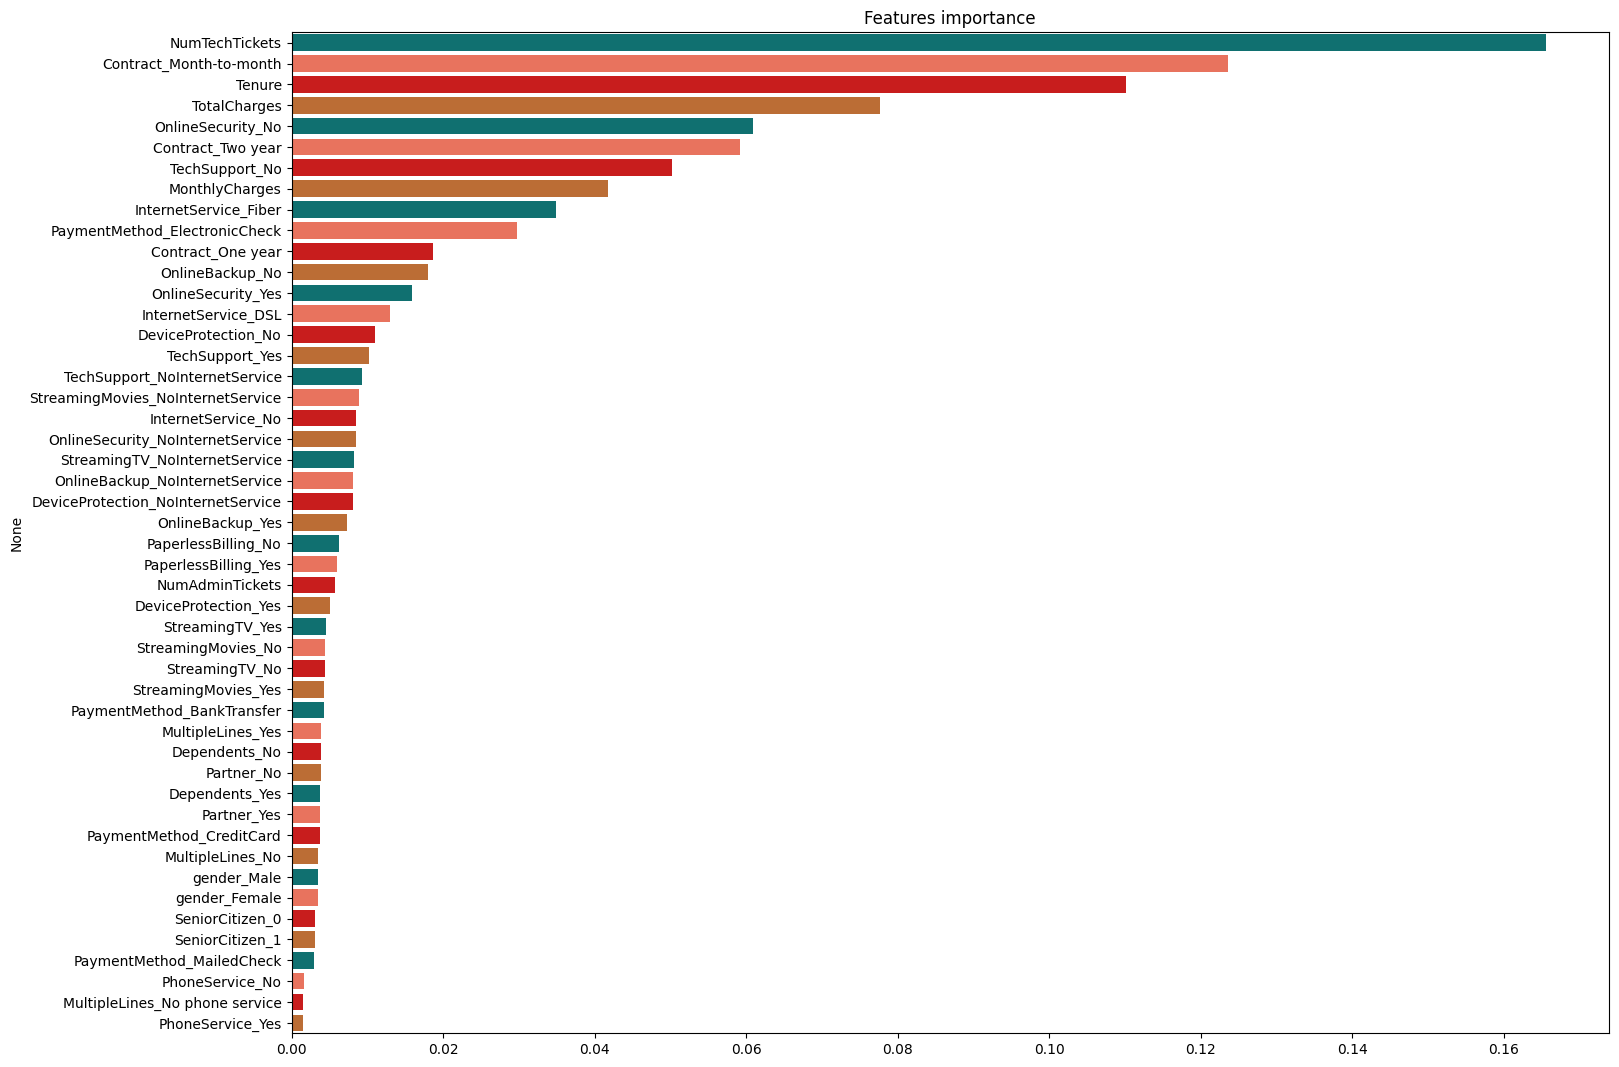

In [141]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=5000, random_state=13)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Features importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')

**2) Random Forest**

In [142]:

rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [143]:

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1142  149]
 [ 143  324]]


In [144]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1291
           1       0.68      0.69      0.69       467

    accuracy                           0.83      1758
   macro avg       0.79      0.79      0.79      1758
weighted avg       0.83      0.83      0.83      1758



* K-Fold Cross-validation

In [145]:

from statistics import stdev
score = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall', error_score="raise")
rf_cv_score = score.mean()
rf_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', rf_cv_score)
print('Cross Validation Recall standard deviation: ', rf_cv_stdev)

Cross Validation Recall scores are: [0.95096774 0.94967742 1.         1.         0.99870801]
Average Cross Validation Recall score:  0.979870634325248
Cross Validation Recall standard deviation:  0.02698257251749145


In [146]:

ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy, rf_roc_auc, rf_cv_score, rf_cv_stdev)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest,0.69379,0.684989,0.689362,0.833902,0.789188,0.979871,0.026983


* Hyperparameter Tuning Using GridSearchCV

In [147]:

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [130], # 'n_estimators': [120,130,150,170,190,200],
    'max_depth': [14],  # 'max_depth': [8,10,12,14,15],
    'min_samples_split': [3], # 'min_samples_split': [3,4,5,6],
    'min_samples_leaf': [2], # 'min_samples_leaf': [1,2,3],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [148]:

print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 130, 'random_state': 13}
Best score: 0.9594672001333666


In [149]:

y_pred = grid_rf.predict(X_test)

In [150]:

cm = confusion_matrix(y_test, y_pred)

grid_rf_Recall = recall_score(y_test, y_pred)
grid_rf_Precision = precision_score(y_test, y_pred)
grid_rf_f1 = f1_score(y_test, y_pred)
grid_rf_accuracy = accuracy_score(y_test, y_pred)
grid_roc_auc = roc_auc_score(y_test, y_pred)

print(cm)

[[1100  191]
 [  95  372]]


In [151]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1291
           1       0.66      0.80      0.72       467

    accuracy                           0.84      1758
   macro avg       0.79      0.82      0.80      1758
weighted avg       0.85      0.84      0.84      1758



* K-Fold Cross-validation

In [152]:

score2 = cross_val_score(grid_rf, X_train, y_train, cv=5, scoring='recall')

In [153]:

grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

Cross Validation Recall scores are: [0.92387097 0.93806452 0.9754522  0.9754522  0.98449612]
Average Cross Validation Recall score:  0.9594672001333666
Cross Validation Recall standard deviation:  0.0267518872450765


In [154]:

ndf2 = [(grid_rf_Recall, grid_rf_Precision, grid_rf_f1, grid_rf_accuracy, grid_roc_auc, grid_cv_score, grid_cv_stdev)]

grid_score = pd.DataFrame(data = ndf2, columns=
                        ['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_score.insert(0, 'Model', 'Random Forest after tuning')
grid_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Random Forest after tuning,0.796574,0.660746,0.72233,0.837315,0.824313,0.959467,0.026752


**3) XGBoost**

In [155]:

from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [156]:

y_pred = XGBC.predict(X_test)

In [157]:

XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1111  180]
 [  99  368]]


* K-Fold Cross-validation

In [158]:

score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.94967742 0.9483871  0.98191214 0.98062016 0.98837209]
Average Cross Validation Recall score:  0.9697937817787781
Cross Validation Recall standard deviation:  0.01918419223395431


In [159]:

ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]

XGBC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')
XGBC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.788009,0.671533,0.725123,0.841297,0.824291,0.969794,0.019184


* Hyperparameter Tuning Using GridSearchCV

In [160]:

# Step 1: Searching for the optimum parameters for the learning rate and the number of estimators:
params = {'learning_rate': [0.01], #[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators': [450] #range(50,500,50),
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [161]:

print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.9204614486955072


In [162]:

# Step 2: Searching for the optimum parameters for max_depth and min_child_weight:
params = {'max_depth': [7], #range(3,10,2),
              'learning_rate': [0.01],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              # 'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'min_child_weight': [5], #range(1,6,2),
              'n_estimators': [450],
              # 'num_class': [10]
              }

grid_xgb = GridSearchCV(XGBC, param_grid=params, cv=5, scoring='recall').fit(X_train, y_train)

In [163]:

print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 450, 'subsample': 0.8}
Best score: 0.9214940401767109


In [164]:

y_pred = grid_xgb.predict(X_test)

In [165]:

grid_xgb_Recall = recall_score(y_test, y_pred)
grid_xgb_Precision = precision_score(y_test, y_pred)
grid_xgb_f1 = f1_score(y_test, y_pred)
grid_xgb_accuracy = accuracy_score(y_test, y_pred)
grid_xgb_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1068  223]
 [  69  398]]


* K-Fold Cross-validation

In [166]:

score = cross_val_score(grid_xgb, X_train, y_train, cv=5, scoring='recall', error_score="raise")
grid_xgb_cv_score = score.mean()
grid_xgb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', grid_xgb_cv_score)
print('Cross Validation Recall standard deviation: ', grid_xgb_cv_stdev)

Cross Validation Recall scores are: [0.90709677 0.91096774 0.92635659 0.92248062 0.94056848]
Average Cross Validation Recall score:  0.9214940401767109
Cross Validation Recall standard deviation:  0.013290372700537376


In [167]:

ndf = [(grid_xgb_Recall, grid_xgb_Precision, grid_xgb_f1, grid_xgb_accuracy, grid_xgb_roc_auc, grid_xgb_cv_score, grid_xgb_cv_stdev)]

grid_xgb_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
grid_xgb_score.insert(0, 'Model', 'Tuned XGBC')
grid_xgb_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,Tuned XGBC,0.852248,0.640902,0.731618,0.833902,0.839757,0.921494,0.01329
